<a href="https://colab.research.google.com/github/pvidya11/Deep_Learning/blob/main/Projects/01.a)MNIST_Digits_Classification/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Step 1) Load Libraries :</b></h1>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1><b> Step 2) Load Data : </b></h1>

In [ ]:
# mnist digits dataset
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<b>Features :</b> contain Images in the form of Pixles
  <p>60,000 : Training Images of size 28 * 28 Pixles.<br>
  10,000 : Test Images of size 28 * 28 Pixles.</p>
<b>Target :</b> contain classes
  <p>60,000 : Training Rows with Single Target column<br>
  10,000 : Test Rows with Single Target column</p>

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


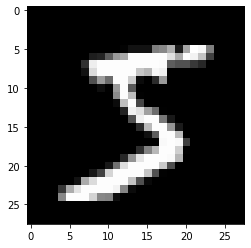

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
y_train[0]

5

In [ ]:
#class labes
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

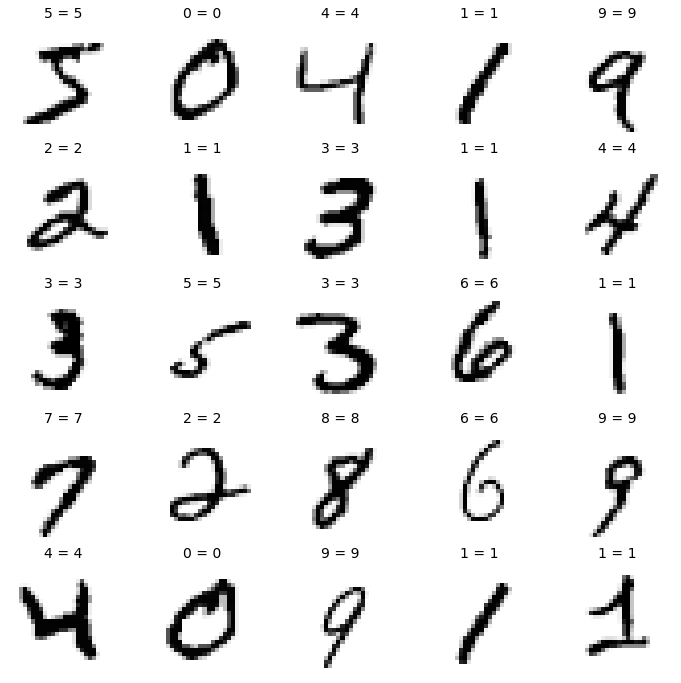

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]] + " = " + str(y_train[i]),fontsize=14)

<h1><b>Step 3) Preprocessing : </b></h1>
  Feature Scaling (standardizations) (0 to 1 range)


In [ ]:
x_train = x_train / 255

In [ ]:
x_test = x_test / 255

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


<h1><b>Step 4) Build Models :</b></h1>



In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(units=32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(units=10 ,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0661 - accuracy: 0.9801 - val_loss: 0.1259 - val_accuracy: 0.9663
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.1277 - val_accuracy: 0.9662
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.1292 - val_accuracy: 0.9649
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.1288 - val_accuracy: 0.9669
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.1314 - val_accuracy: 0.9653
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.1393 - val_accuracy: 0.9649
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.1333 - val_accuracy:

<h1><b>Step 5) Test and Evaluate Model

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1154 - accuracy: 0.9659


[0.11541873961687088, 0.9659000039100647]

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[0].round(2) 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# predicted class
np.argmax(y_pred[0].round(2)) , class_labels[ np.argmax(y_pred[0].round(2)) ]

(7, '7')

In [ ]:
# actual class
y_test[0], class_labels[y_test[0]]

(7, '7')

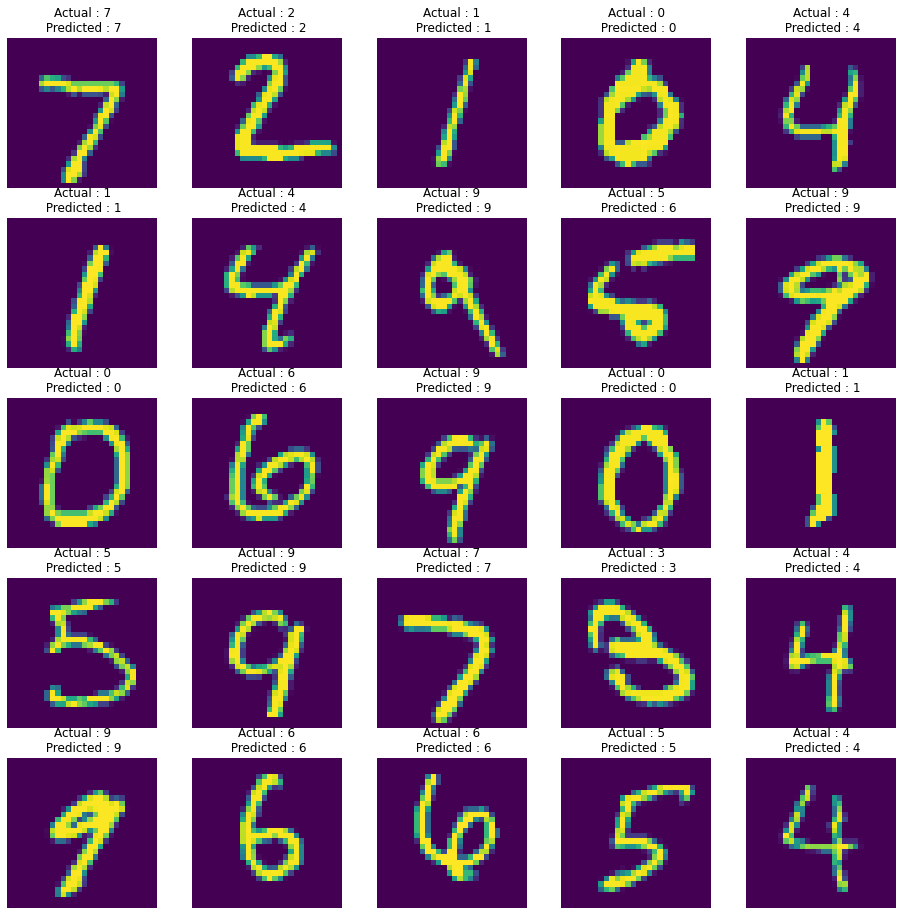

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title("Actual : {}\n Predicted : {}".format(class_labels[y_test[i]],
                                                  class_labels[np.argmax(y_pred[i])]),
                                          fontsize=12)

<h1><b>Confusion Matrix</b></h1>


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred] )
cm

array([[ 965,    0,    0,    2,    0,    6,    4,    1,    2,    0],
       [   0, 1125,    3,    1,    0,    0,    2,    0,    4,    0],
       [   7,    3,  994,    7,    3,    1,    5,    4,    7,    1],
       [   0,    3,   10,  962,    1,   12,    2,    4,   10,    6],
       [   0,    0,    3,    0,  955,    0,   11,    1,    3,    9],
       [   4,    0,    0,    9,    2,  857,    9,    2,    7,    2],
       [   6,    3,    1,    1,    1,    6,  935,    0,    4,    1],
       [   2,   11,   14,    5,    4,    0,    0,  973,    5,   14],
       [   5,    1,    2,   11,    4,    9,    3,    1,  935,    3],
       [   3,    6,    0,   10,   16,    8,    2,    4,    2,  958]])

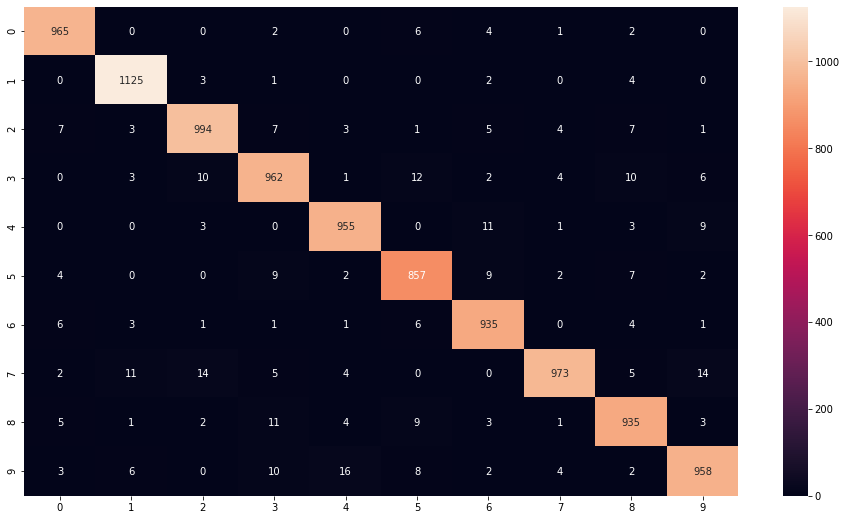

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True,fmt="d")

<h1><b>Classification Report</b></h1>


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,[np.argmax(i) for i in y_pred],target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.95      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.96      0.96       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<h1><b>Save Model </b></h1>

In [ ]:
model.save("MNIST_digits_classifier.h5")

In [ ]:
# used for deployment
model_new = keras.models.load_model("MNIST_digits_classifier.h5")

In [ ]:
# in the form of probability of all classes.
model_new.predict(x_test)

array([[8.2182385e-07, 1.4421655e-08, 2.9997891e-04, ..., 9.9628180e-01,
        3.0175128e-04, 1.6084271e-04],
       [1.4960184e-08, 1.5723763e-06, 9.9999821e-01, ..., 9.7161286e-14,
        1.8630574e-08, 1.6976536e-12],
       [5.9093304e-07, 9.9674475e-01, 5.9907092e-04, ..., 8.7656837e-04,
        1.4389245e-03, 1.5056524e-06],
       ...,
       [1.2176885e-12, 1.1278067e-09, 5.2364394e-11, ..., 5.2891994e-07,
        5.0796848e-07, 4.4679960e-05],
       [1.5469059e-13, 1.6631290e-11, 1.9183479e-14, ..., 9.7735578e-13,
        2.5816562e-06, 4.7273856e-12],
       [2.4055939e-07, 3.1907607e-10, 2.9113463e-07, ..., 1.0805126e-12,
        6.1895489e-11, 4.6270808e-12]], dtype=float32)

In [ ]:
len(x_test),len(x_test[0]),len(x_test[0][0]) 

(10000, 28, 28)